In [22]:
import generator

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# No outliers

In [24]:
data = [generator.generate_step(t=t, period=24, amplitude=100, error=20, mean=200) for t in range(24*7)]

In [25]:
df = pd.DataFrame(data={
    'x': range(24*7),
    'ds': pd.date_range(start="now", periods=24*7, freq='1h'),
    'y': data
})

In [26]:
df

,x,ds,y
0,0,2022-06-22 14:00:15.347688,200.129472
1,1,2022-06-22 15:00:15.347688,226.649153
2,2,2022-06-22 16:00:15.347688,260.852937
3,3,2022-06-22 17:00:15.347688,289.452315
4,4,2022-06-22 18:00:15.347688,301.712805
...,...,...,...
163,163,2022-06-29 09:00:15.347688,118.958614
164,164,2022-06-29 10:00:15.347688,132.933711
165,165,2022-06-29 11:00:15.347688,140.688819
166,166,2022-06-29 12:00:15.347688,157.534902


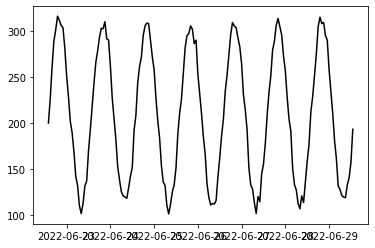

In [27]:
plt.plot(df.ds, df.y, c="k")

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

from alibi_detect.od import OutlierProphet
from alibi_detect.utils.fetching import fetch_detector
from alibi_detect.utils.saving import save_detector, load_detector

In [29]:
od = OutlierProphet(threshold=.95)

In [30]:
od.fit(df[['ds', 'y']])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Initial log joint probability = -6.26985
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       594.194   1.35714e-05       59.0465      0.2303           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       594.294   7.54588e-05       71.9877   7.699e-07       0.001      228  LS failed, Hessian reset 
     199       594.406   2.90489e-05       75.8099       1.209      0.1209      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       594.448   1.43846e-06       78.1614      0.3267           1      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       594.449   8.44873e-06       78.7661   9.221e-08       0.001      480  LS failed, Hessian reset 
     337       594.449   1.92338e-08        66.961      0.2368      0.9373      515   
Optimization terminat

/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [31]:
od_preds = od.predict(
    df,
    return_instance_score=True,
    return_forecast=True
)

/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [32]:
df['outlier'] = od_preds['data']['is_outlier'].is_outlier

In [33]:
df['colour'] = df['outlier'].apply(lambda x: "k" if x==0 else "r")
df['label'] = df['outlier'].apply(lambda x: "Normal" if x==0 else "Anomaly")

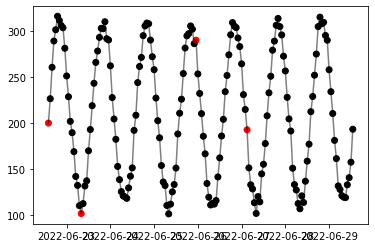

In [34]:
plt.plot(df.ds, df.y, alpha=0.5, c='k')
plt.scatter(df.ds, df.y, c=df.colour, label=df.colour)
plt.show()

# Outliers

In [35]:
anomaly_times=[10, 27, 83, 128]
for t in anomaly_times:
    data[t] *= 1.25

In [36]:
df = pd.DataFrame(data={
    'x': range(24*7),
    'ds': pd.date_range(start="now", periods=24*7, freq='1h'),
    'y': data
})

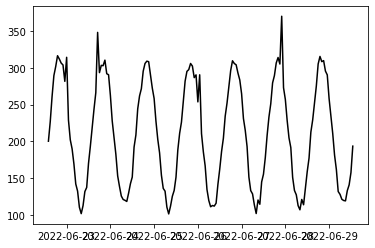

In [37]:
plt.plot(df.ds, df.y, c="k")

In [38]:
od = OutlierProphet(threshold=.95)

In [39]:
od.fit(df[['ds', 'y']])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Initial log joint probability = -5.31903
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        505.84   7.58087e-07       60.0882      0.4814      0.4814      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       505.841   1.13488e-06       64.4625   1.531e-08       0.001      185  LS failed, Hessian reset 
     134       505.841   3.06401e-08       53.8443           1           1      216   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [40]:
od_preds = od.predict(
    df,
    return_instance_score=True,
    return_forecast=True
)

/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/rui/.virtualenvs/rhose-experiments/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [41]:
df['outlier'] = od_preds['data']['is_outlier'].is_outlier
df['colour'] = df['outlier'].apply(lambda x: "k" if x==0 else "r")
df['label'] = df['outlier'].apply(lambda x: "Normal" if x==0 else "Anomaly")

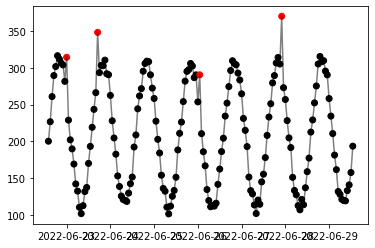

In [42]:
plt.plot(df.ds, df.y, alpha=0.5, c='k')
plt.scatter(df.ds, df.y, c=df.colour, label=df.colour)
plt.show()

In [43]:
from alibi_detect.utils.saving import save_detector

save_detector(detector=od, filepath="./model")